# 전이학습 기초

In [8]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

# 사전 학습된 모델 불러오기
# input_tensor = Input(shape=(150,150,3))


# include_top : 신경망 FC 층 존재 유무 ( False : 제거 / True : 유지 )
# weights : 가중치 모델 지정 ( None : 초기화된 가중치, 'imagenet' : 사전 학습된 가중치 )
# input_tensor : 입력 텐서 크기 ( Input(shape = (w, h, ch))

#model = VGG16(weights='imagenet', include_top=False, input_tensor = input_tensor)  

model = VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [9]:
cd /content/drive/MyDrive/데이터/텐서플로우/

/content/drive/MyDrive/데이터/텐서플로우


In [20]:
#fileName=input image 
import numpy as np
fileName = '자동차.jpg'
image = load_img(fileName, target_size=(224, 224))
image = img_to_array(image)
print(np.shape(image))
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2]) # (주의) model학습 및 예측을 위해 4차원으로 reshape

(224, 224, 3)


In [21]:
image = preprocess_input(image) # vgg16제공 전처리(예: 스케일링, 흑백변경 등)
yhat = model.predict(image)  #yhat, imagenet에서 제공하는 카테고리가 1000개임.
print(np.shape(yhat))
print(len(yhat[0]))

(1, 1000)
1000


In [22]:
label = decode_predictions(yhat) # 상위 5개 출력 [코드넘버, class_name, 1중에서 얼마나 가중치가 있는가]
label

[[('n04285008', 'sports_car', 0.4710322),
  ('n03459775', 'grille', 0.24736133),
  ('n03100240', 'convertible', 0.11644953),
  ('n02814533', 'beach_wagon', 0.048029795),
  ('n02974003', 'car_wheel', 0.027772235)]]

In [23]:
label = label[0][0]
print('%s (%.2f%%)'%(label[1], label[2]*100)) # class_name, 가중치 출력

sports_car (47.10%)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


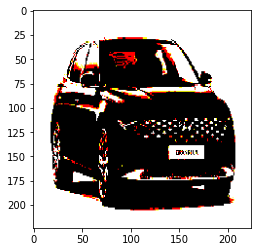

In [26]:
import matplotlib.pyplot as plt

plt.imshow(image.reshape(224,224,3))
plt.show()

In [19]:
# for를 넣어서 자료를 여러개 인지
fileNameList = ['자동차.jpg', '코끼리.jpg']

for fileName in fileNameList:
    image = load_img(fileName, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
    image = preprocess_input(image) # vgg16제공 전처리(예: 스케일링, 흑백변경 등), 전처리는 한번만 적용하기(여러번 적용하면 계속 값이 바뀜.)
    yhat = model.predict(image)  #yhat, imagenet에서 제공하는 카테고리가 1000개임.
    label = decode_predictions(yhat) # 상위 5개 출력 [코드넘버, class_name, 1중에서 얼마나 가중치가 있는가]
    label = label[0][0]
    print('%s (%.2f%%)'%(label[1], label[2]*100)) # class_name, 가중치 출력

sports_car (47.10%)
African_elephant (82.79%)
